<a href="https://colab.research.google.com/github/rmonterof/Scikit-learn/blob/main/1_17_Clasificaci%C3%B3n_binaria_Regresi%C3%B3n_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación binaria

Ejemplo utilizando Regresión logística (LogisticRegression)

Dataset: audicion

variable target:
* test_result: 0 o 1

variables independientes:
* age
* physical_score


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score, ConfusionMatrixDisplay, f1_score, fbeta_score, RocCurveDisplay, roc_curve, auc, roc_auc_score
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 110

In [ ]:
df = pd.read_csv('../data/audicion.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [ ]:
df.shape

(5000, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [ ]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

[Text(0, 0, '2000'), Text(0, 0, '3000')]

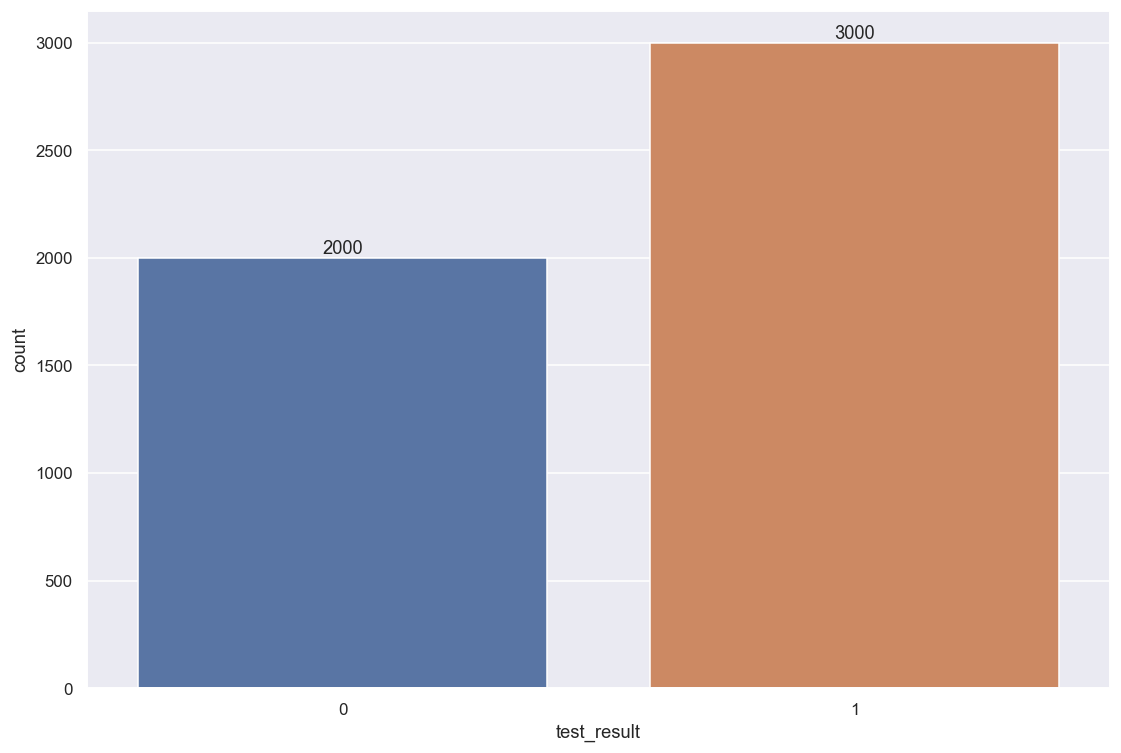

In [ ]:
ax = sns.countplot(x='test_result', data=df)
ax.bar_label(ax.containers[0])

age                  AxesSubplot(0.125,0.653529;0.227941x0.226471)
physical_score    AxesSubplot(0.398529,0.653529;0.227941x0.226471)
test_result       AxesSubplot(0.672059,0.653529;0.227941x0.226471)
dtype: object

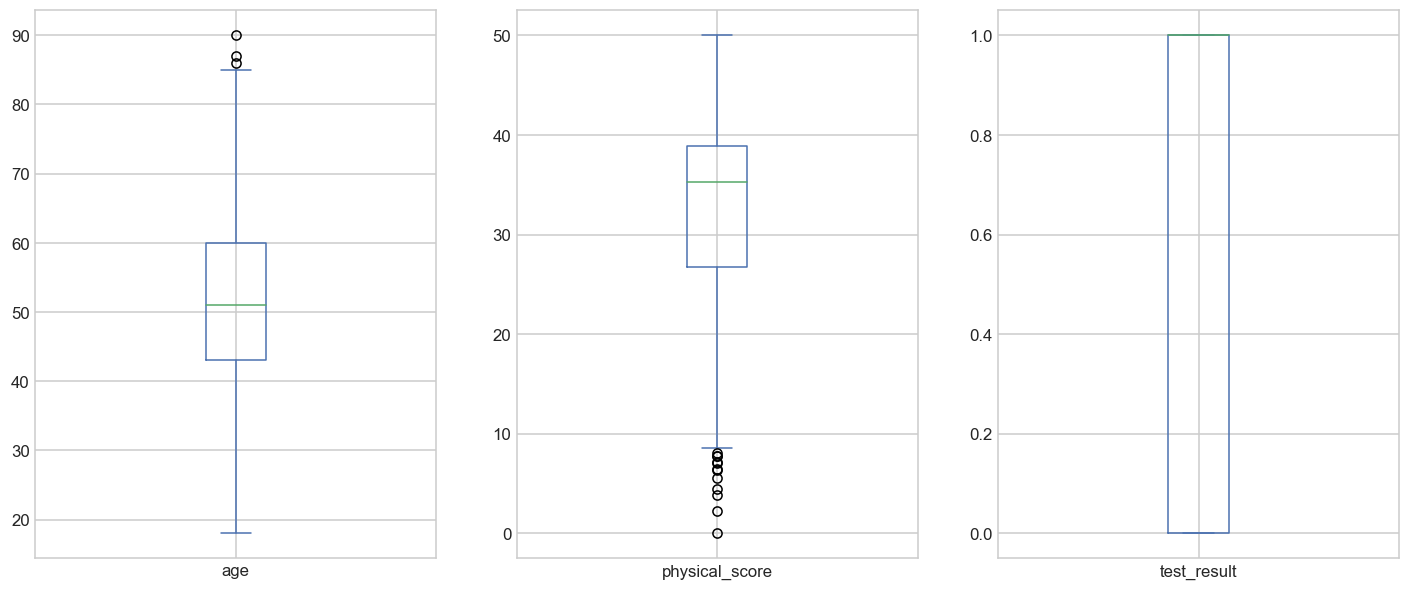

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(16,22))

<AxesSubplot: xlabel='test_result', ylabel='age'>

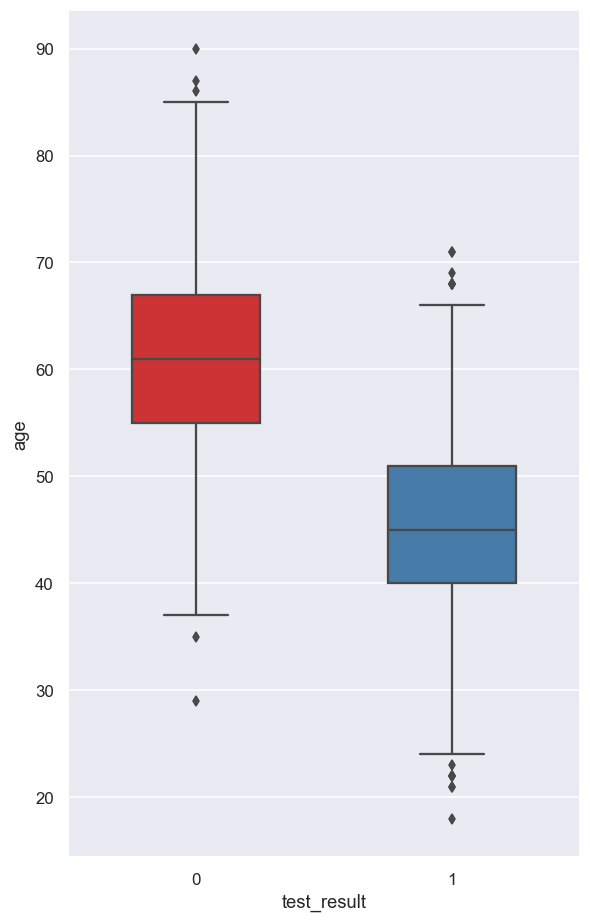

In [ ]:
sns.boxplot(x="test_result", y="age", data=df, palette="Set1", width=0.5)

<AxesSubplot: xlabel='test_result', ylabel='physical_score'>

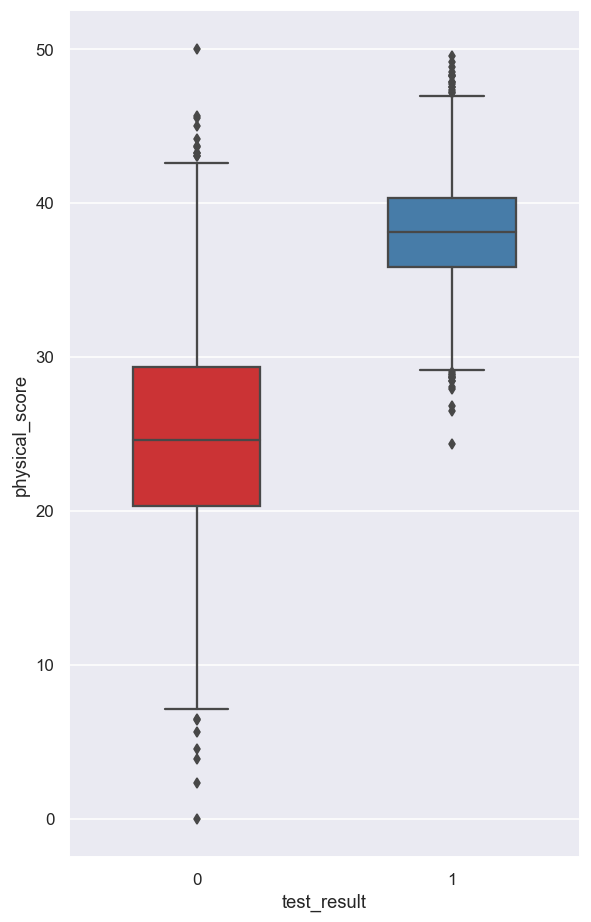

In [ ]:
sns.boxplot(x="test_result", y="physical_score", data=df, palette="Set1", width=0.5)

<AxesSubplot: xlabel='age', ylabel='physical_score'>

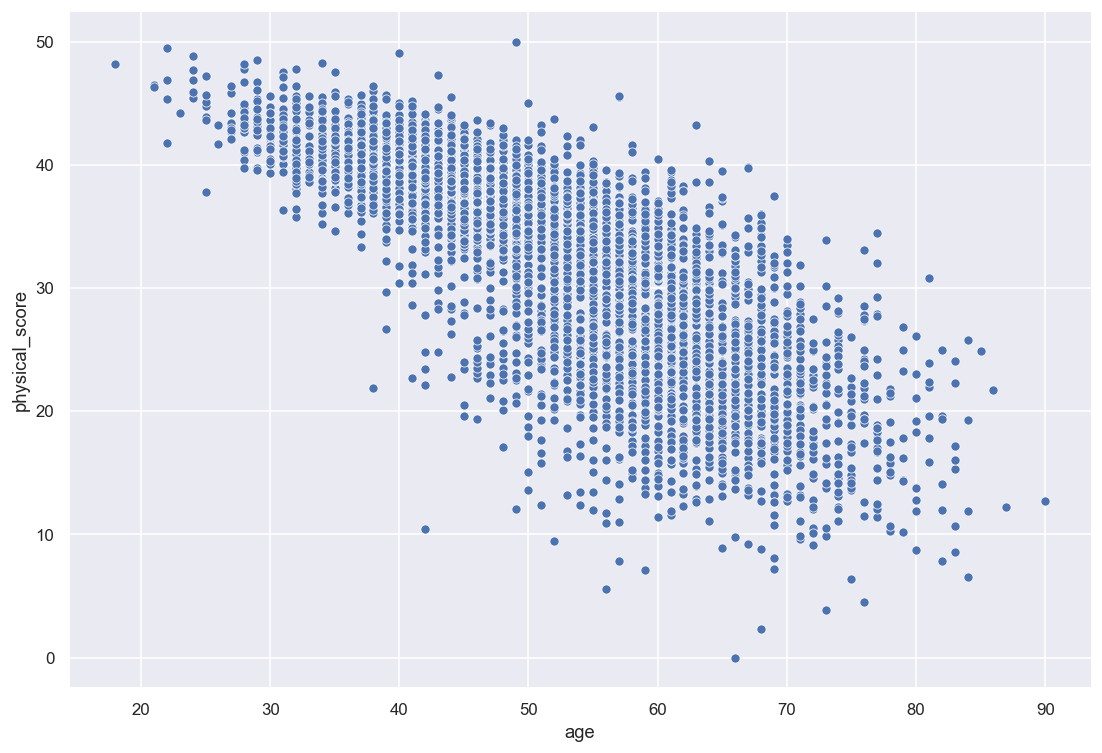

In [ ]:
sns.set(rc={"figure.figsize":(12, 8)}) #width=6, height=5
sns.scatterplot(x='age',y='physical_score', data=df)

<AxesSubplot: xlabel='age', ylabel='physical_score'>

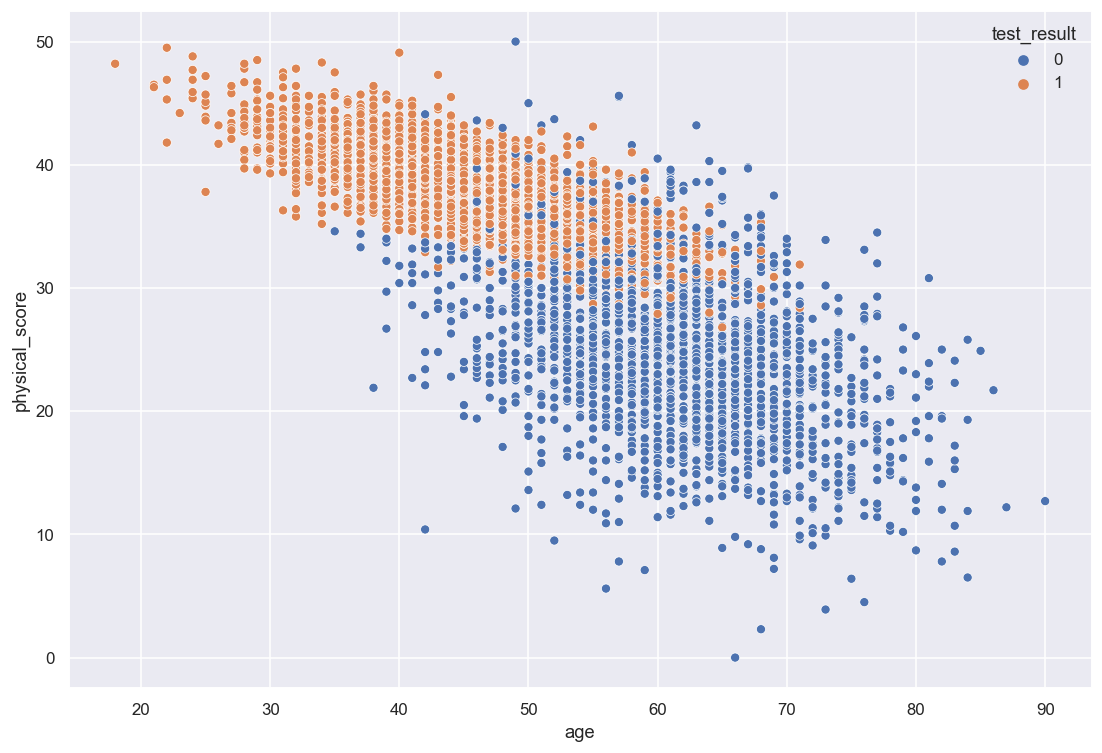

In [ ]:
sns.scatterplot(x='age',y='physical_score', hue='test_result', data=df)

<AxesSubplot: xlabel='age', ylabel='test_result'>

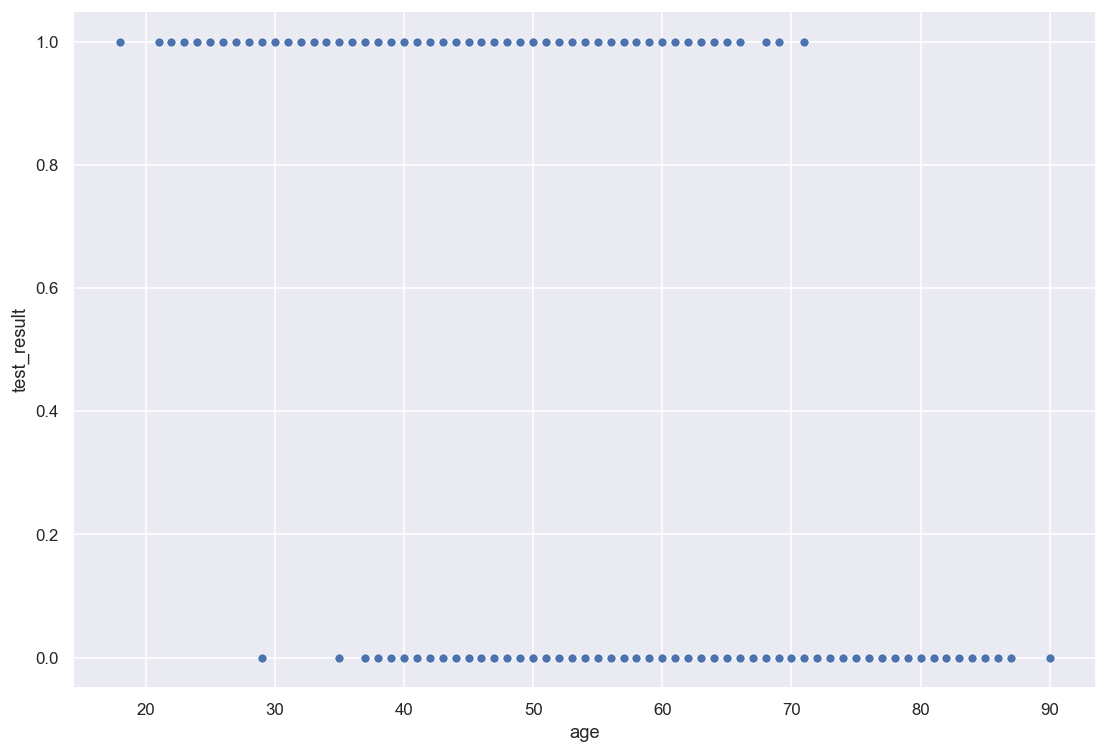

In [ ]:
sns.scatterplot(x='age',y='test_result', data=df)

<AxesSubplot: xlabel='physical_score', ylabel='test_result'>

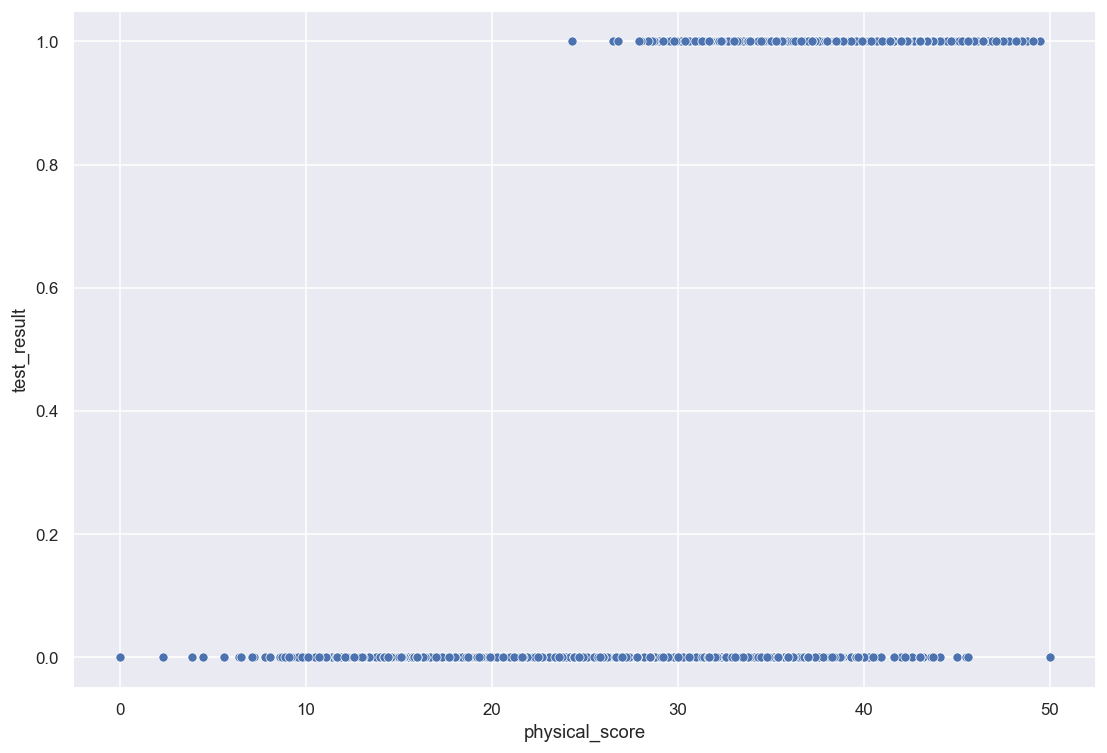

In [ ]:
sns.scatterplot(x='physical_score',y='test_result', data=df)

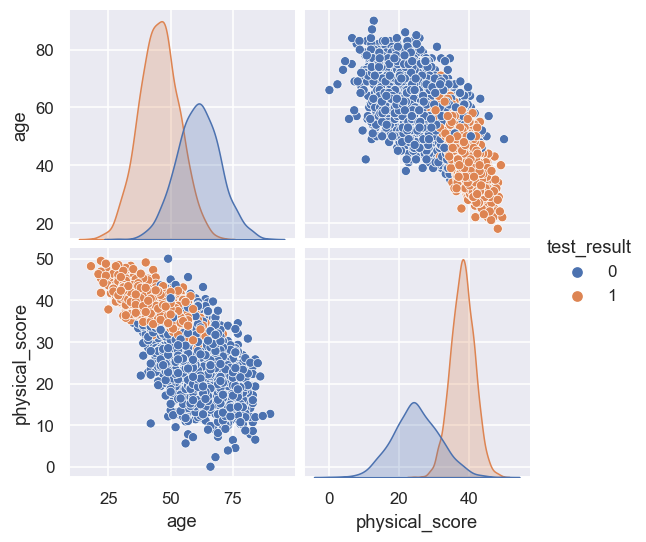

In [ ]:
sns.pairplot(data=df, hue='test_result')

<AxesSubplot: >

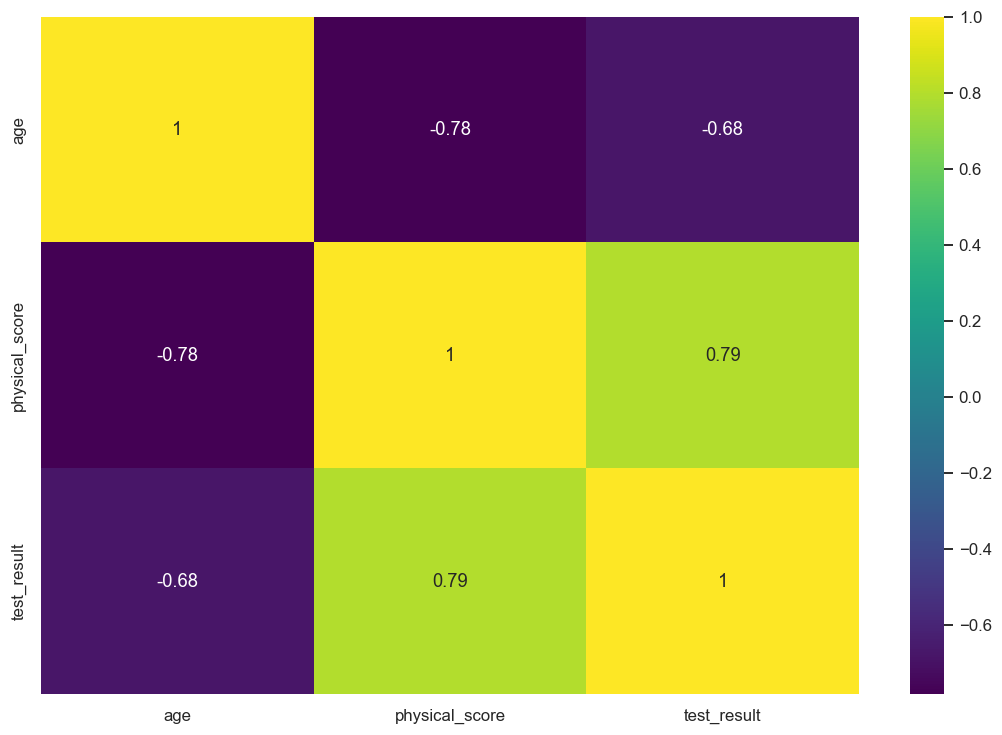

In [ ]:
sns.heatmap(df.corr(), cmap='viridis', annot=True)

In [ ]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print(cm)

[[326  58]
 [ 45 571]]


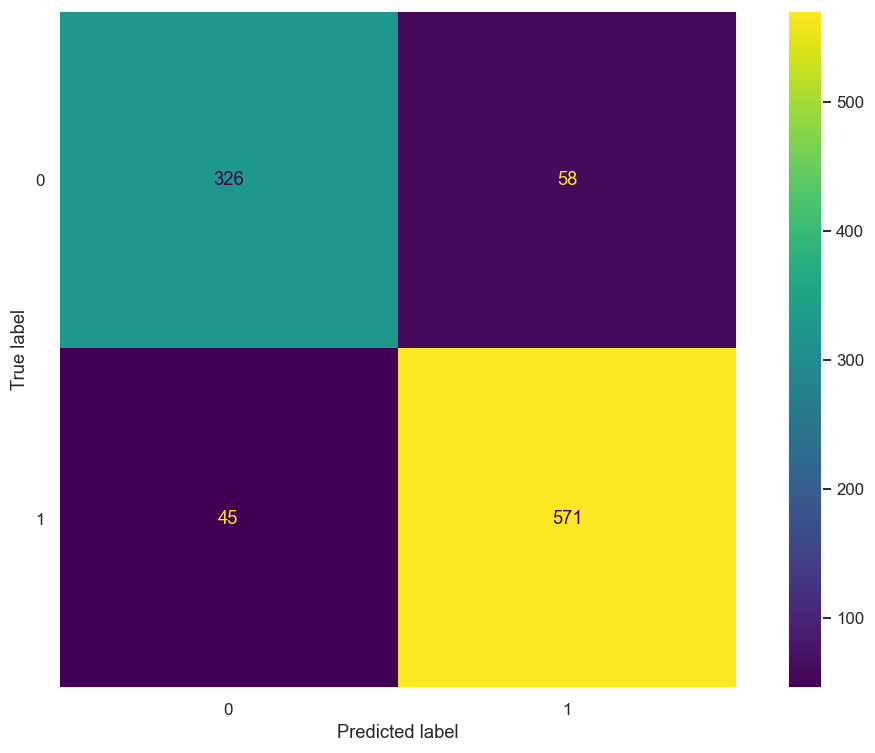

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       384
           1       0.91      0.93      0.92       616

    accuracy                           0.90      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.90      0.90      0.90      1000



In [ ]:
# (TP + TN) / Total
print("accuracy_score: ", accuracy_score(y_test, y_pred))

# precision: cuando la prediccion es positive, cómo de correcto es esa predicción ?
# True Positive / (True Positive + False Positive)
print("precision_score: ", precision_score(y_test, y_pred))

#  recall: como de capaz es el modelo de predecir si hay un caso correcto
# recall (sensitivity)
# True Positive / (True Positive + False Negative)
print("recall_score: ", recall_score(y_test, y_pred))
print("f1_score: ", f1_score(y_test, y_pred))
print("fbeta_score: ", fbeta_score(y_test, y_pred, beta=0.5))

accuracy_score:  0.897
precision_score:  0.9077901430842608
recall_score:  0.926948051948052
f1_score:  0.9172690763052208
fbeta_score:  0.9115581098339719


In [ ]:
print("accuracy: ", accuracy_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred))
print("recall (Sensitivity): ", recall_score(y_test, y_pred))
print("recall (Specificity): ", recall_score(y_test, y_pred, pos_label=0))
print("F1-score: ", f1_score(y_test, y_pred))
print("AUC: ", roc_auc_score(y_test, y_pred))

accuracy:  0.897
precision:  0.9077901430842608
recall (Sensitivity):  0.926948051948052
recall (Specificity):  0.8489583333333334
F1-score:  0.9172690763052208
AUC:  0.8879531926406926


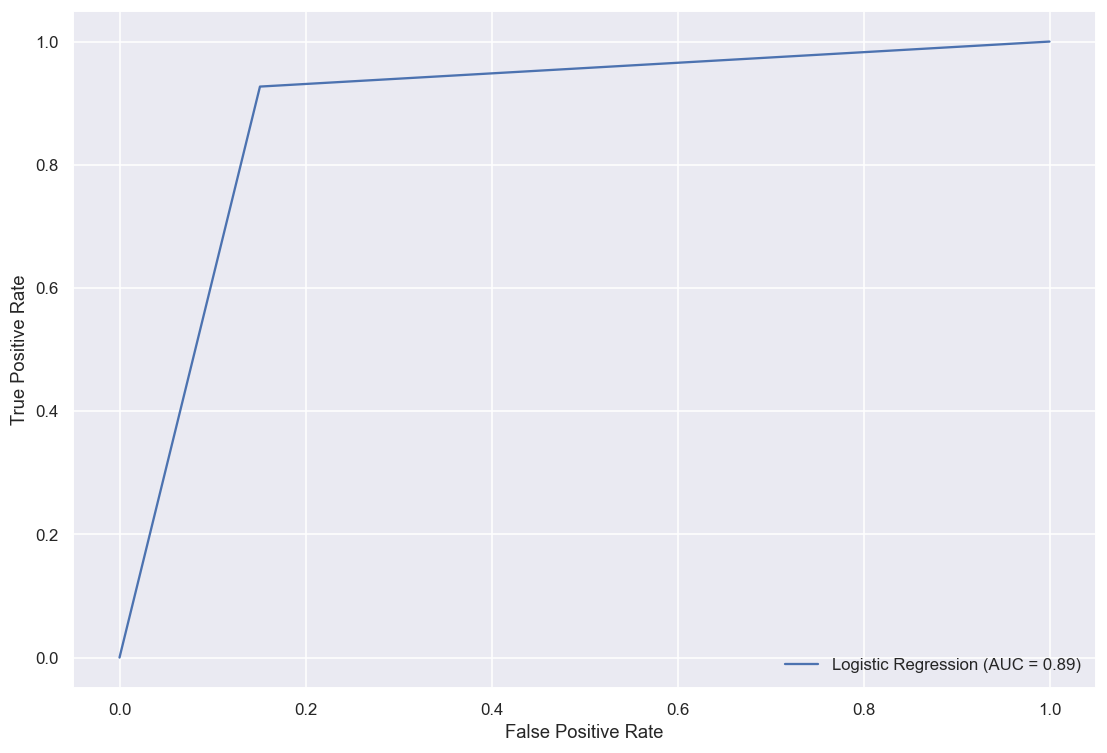

In [ ]:
"""
Otra herramienta para medir visualmente el rendimiento del modelo de clasificación es la curva ROC. Curva ROC significa Curva característica operativa del receptor. Una curva ROC es un gráfico que muestra el rendimiento de un modelo de clasificación en varios niveles de umbral de clasificación.

La curva ROC traza la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) en varios niveles de umbral.

La tasa de verdaderos positivos (TPR) también se denomina recuperación. Se define como la relación de TP a (TP + FN).

La tasa de falsos positivos (FPR) se define como la proporción de FP a (FP + TN).

En la curva ROC, nos centraremos en la TPR (tasa de verdaderos positivos) y la FPR (tasa de falsos positivos) de un solo punto. Esto nos dará el rendimiento general de la curva ROC que consta de TPR y FPR en varios niveles de umbral. Entonces, una curva ROC traza TPR vs FPR en diferentes niveles de umbral de clasificación. Si bajamos los niveles de umbral, puede resultar en que más elementos se clasifiquen como positivos. Aumentará tanto los verdaderos positivos (TP) como los falsos positivos (FP).
"""

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()

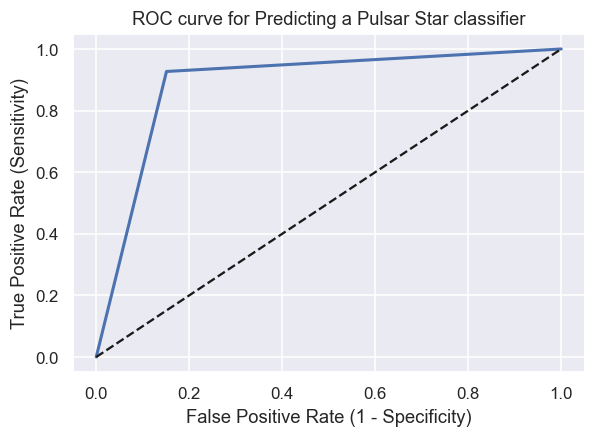

In [ ]:
# Otra forma de pintar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
"""
ROC AUC significa Característica de funcionamiento del receptor: área bajo la curva. Es una técnica para comparar el rendimiento del clasificador. En esta técnica, medimos el área bajo la curva (AUC). Un clasificador perfecto tendrá un ROC AUC igual a 1, mientras que un clasificador puramente aleatorio tendrá un ROC AUC igual a 0,5.

Entonces, ROC AUC es el porcentaje del gráfico ROC que está debajo de la curva.

ROC AUC es un resumen de un solo número del rendimiento del clasificador. Cuanto mayor sea el valor, mejor será el clasificador.
"""
ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8880


## Visualización extra

In [ ]:
def evalBinaryClassifier(model, x, y, labels=['Positives','Negatives']):
    '''
    Visualize the performance of  a Logistic Regression Binary Classifier.

    Displays a labelled Confusion Matrix, distributions of the predicted
    probabilities for both classes, the ROC curve, and F1 score of a fitted
    Binary Logistic Classifier. Author: gregcondit.com/articles/logr-charts

    Parameters
    ----------
    model : fitted scikit-learn model with predict_proba & predict methods
        and classes_ attribute. Typically LogisticRegression or
        LogisticRegressionCV

    x : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples
        in the data to be tested, and n_features is the number of features

    y : array-like, shape (n_samples,)
        Target vector relative to x.

    labels: list, optional
        list of text labels for the two classes, with the positive label first

    Displays
    ----------
    3 Subplots

    Returns
    ----------
    F1: float
    '''
    #model predicts probabilities of positive class
    p = model.predict_proba(x)
    if len(model.classes_)!=2:
        raise ValueError('A binary class problem is required')
    if model.classes_[1] == 1:
        pos_p = p[:,1]
    elif model.classes_[0] == 1:
        pos_p = p[:,0]

    #FIGURE
    plt.figure(figsize=[15,4])

    #1 -- Confusion matrix
    cm = confusion_matrix(y,model.predict(x))
    plt.subplot(131)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False,
                     annot_kws={"size": 14}, fmt='g')
    cmlabels = ['True Negatives', 'False Positives',
                'False Negatives', 'True Positives']
    for i,t in enumerate(ax.texts):
        t.set_text(t.get_text() + "\n" + cmlabels[i])
    plt.title('Confusion Matrix', size=15)
    plt.xlabel('Predicted Values', size=13)
    plt.ylabel('True Values', size=13)

    #2 -- Distributions of Predicted Probabilities of both classes
    df = pd.DataFrame({'probPos':pos_p, 'target': y})
    plt.subplot(132)
    plt.hist(df[df.target==1].probPos, density=True, bins=25,
             alpha=.5, color='green',  label=labels[0])
    plt.hist(df[df.target==0].probPos, density=True, bins=25,
             alpha=.5, color='red', label=labels[1])
    plt.axvline(.5, color='blue', linestyle='--', label='Boundary')
    plt.xlim([0,1])
    plt.title('Distributions of Predictions', size=15)
    plt.xlabel('Positive Probability (predicted)', size=13)
    plt.ylabel('Samples (normalized scale)', size=13)
    plt.legend(loc="upper right")

    #3 -- ROC curve with annotated decision point
    fp_rates, tp_rates, _ = roc_curve(y,p[:,1])
    roc_auc = auc(fp_rates, tp_rates)
    plt.subplot(133)
    plt.plot(fp_rates, tp_rates, color='green',
             lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], lw=1, linestyle='--', color='grey')
    #plot current decision point:
    tn, fp, fn, tp = [i for i in cm.ravel()]
    plt.plot(fp/(fp+tn), tp/(tp+fn), 'bo', markersize=8, label='Decision Point')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=13)
    plt.ylabel('True Positive Rate', size=13)
    plt.title('ROC Curve', size=15)
    plt.legend(loc="lower right")
    plt.subplots_adjust(wspace=.3)
    plt.show()
    #Print and Return the F1 score
    tn, fp, fn, tp = [i for i in cm.ravel()]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2*(precision * recall) / (precision + recall)
    printout = (
        f'Precision: {round(precision,2)} | '
        f'Recall: {round(recall,2)} | '
        f'F1 Score: {round(F1,2)} | '
    )
    print(printout)
    return F1

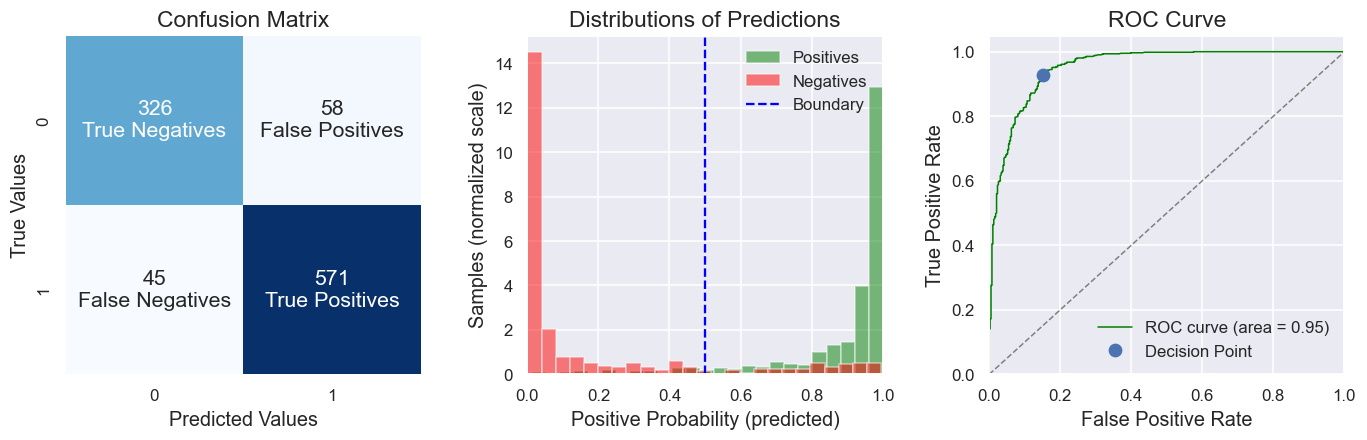

Precision: 0.91 | Recall: 0.93 | F1 Score: 0.92 | 


In [ ]:
F1 = evalBinaryClassifier(model,X_test_scaled,y_test)